In [41]:
#Данные сегментации клиентов торгового центра
import pandas as pd


df=pd.read_csv('C:/Users/Alex/Desktop/Data S/Shopping_data.csv')
del df['CustomerID'] 

df.head(10)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [42]:
df.shape

(200, 4)

In [43]:
df.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [44]:
df.dtypes

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [45]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [70]:
import matplotlib.pyplot as plt

In [48]:
Df2=pd.DataFrame(df["Genre"].value_counts(),df["Genre"].unique())

Df2

,count
Male,88
Female,112


In [49]:
Df3=pd.DataFrame(df["Age"].value_counts(),df["Age"].unique())

Df3

,count
19,8
21,5
20,5
23,6
31,8
22,3
35,9
64,1
30,7
67,4


<Axes: ylabel='count'>

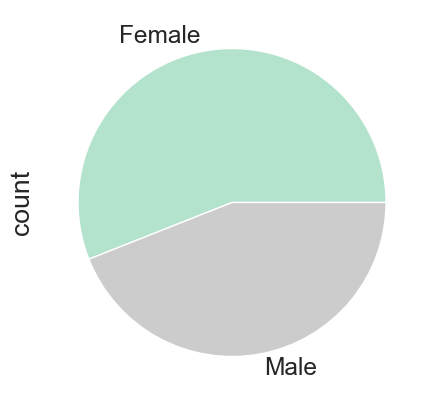

In [56]:
df.Genre.value_counts().plot(kind='pie',figsize=(5,5),colormap="Pastel2")

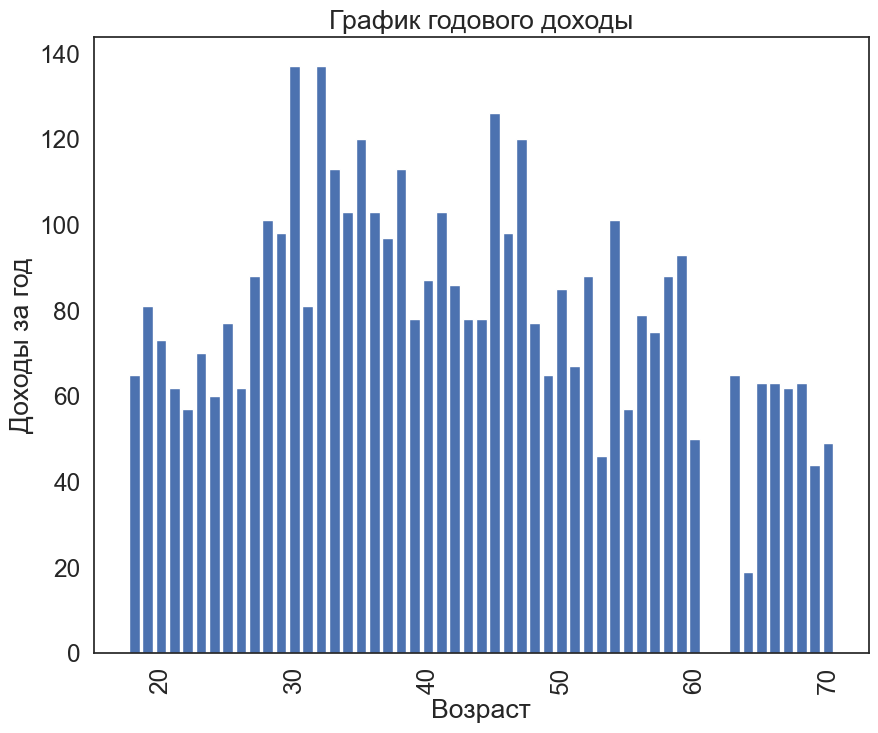

In [57]:
plt.figure(figsize=(10,8))
plt.bar(df["Age"],df["Annual Income (k$)"])
plt.xticks(rotation=90)

plt.title('График годового доходы')
plt.xlabel('Возраст')
plt.ylabel('Доходы за год')

plt.show()

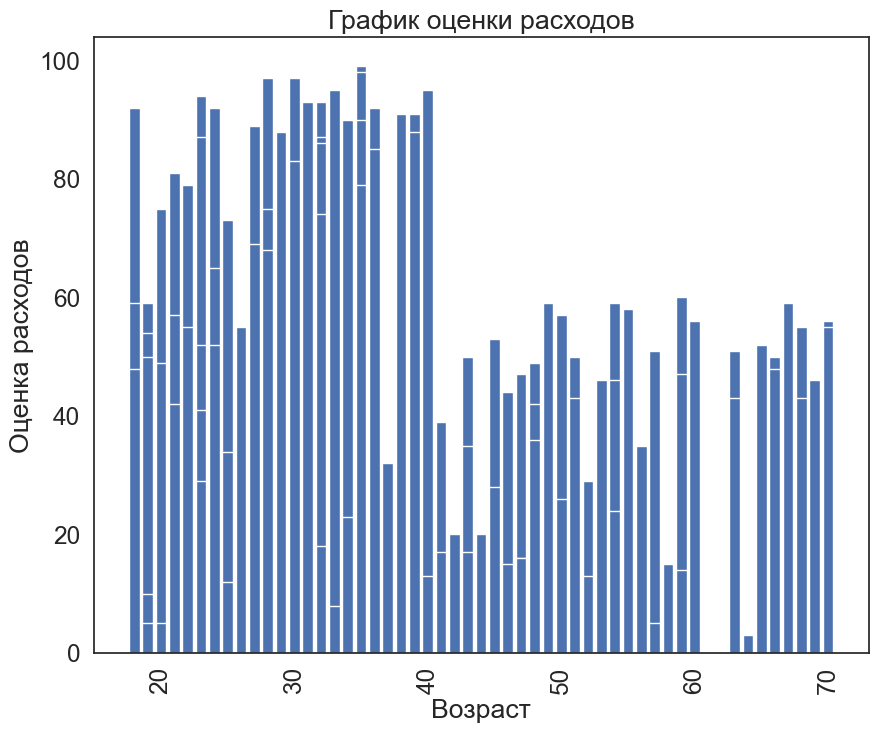

In [58]:
plt.figure(figsize=(10,8))
plt.bar(df["Age"],df["Spending Score (1-100)"])
plt.xticks(rotation=90)

plt.title('График оценки расходов')
plt.xlabel('Возраст')
plt.ylabel('Оценка расходов')

plt.show()

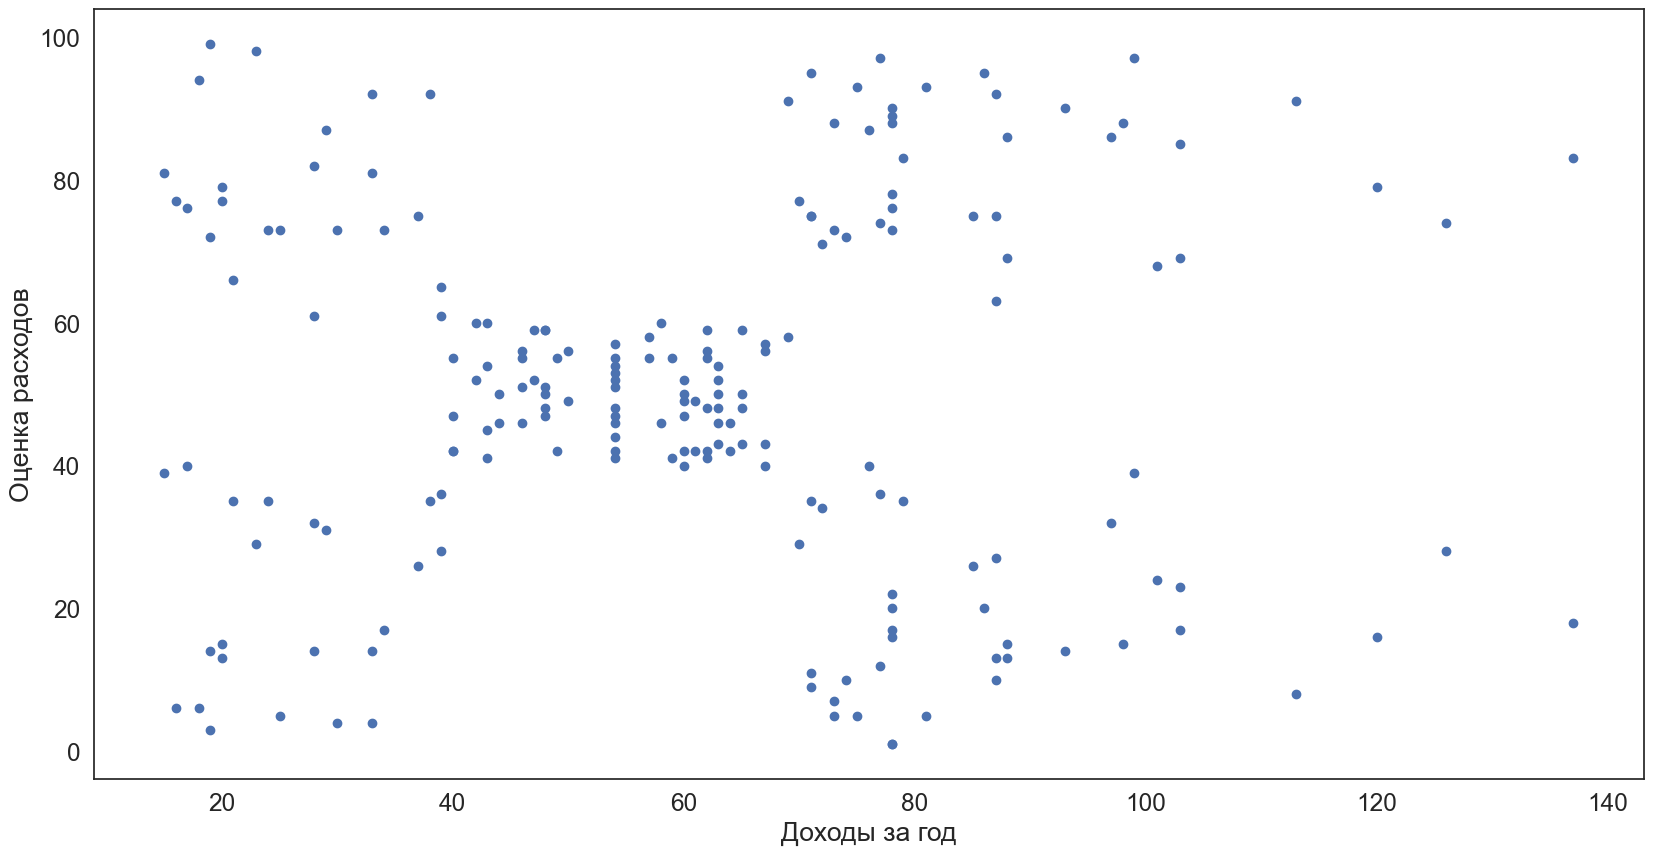

In [59]:
plt.figure(figsize=(20,10))
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])

plt.xlabel('Доходы за год')
plt.ylabel('Оценка расходов')


plt.show()

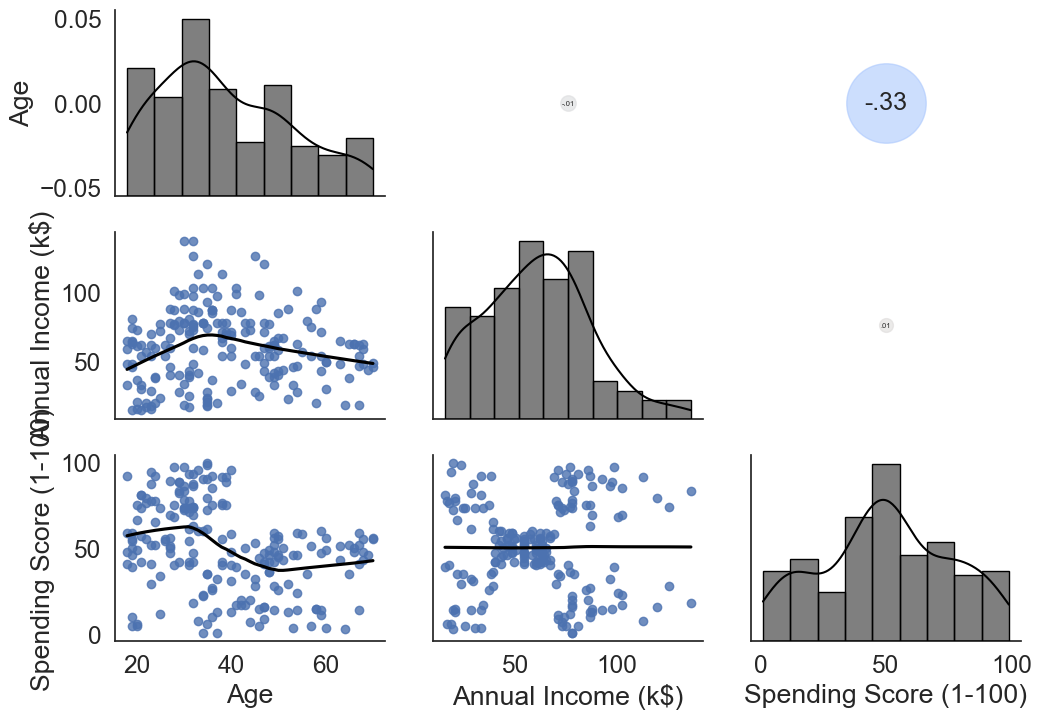

In [60]:
# универсальный метод "всё в одном"

import matplotlib.pyplot as plt
import seaborn as sns

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})

g.map_diag(sns.histplot, kde=True, color='black', edgecolor='black')

g.map_upper(corrdot)

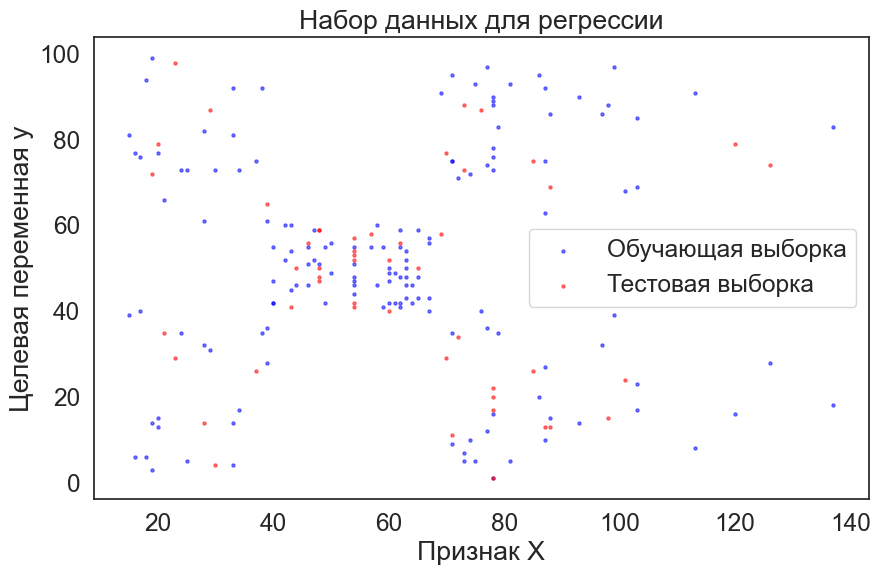

In [64]:
from sklearn.model_selection import train_test_split


X = df['Annual Income (k$)']
y = df['Spending Score (1-100)']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Проверяем размеры выборок
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Визуализация сгенерированных данных
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Обучающая выборка', s=5, alpha=0.5)
plt.scatter(X_test, y_test, color='red', label='Тестовая выборка', s=5, alpha=0.5)
plt.title('Набор данных для регрессии')
plt.xlabel('Признак X')
plt.ylabel('Целевая переменная y')
plt.legend()
plt.show()